In [117]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

读取数据

In [118]:
df = pd.read_excel('all_label.xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8
0,0.119231,0.168419,0.118964,0.168961,0.119125,0.168832,0.118789,0.168671,0
1,0.115471,0.161739,0.000872,0.002214,0.000313,0.001140,0.000802,0.002416,0
2,0.000823,0.002680,0.115532,0.162396,0.000854,0.002112,0.000376,0.001041,0
3,0.000155,0.001159,0.000846,0.002546,0.115364,0.162475,0.000951,0.001917,0
4,0.000729,0.002200,0.000543,0.001217,0.000848,0.002425,0.114745,0.162085,0
...,...,...,...,...,...,...,...,...,...
85,8.416410,11.336995,8.404203,11.335556,8.411974,11.337828,8.412908,11.339104,8
86,8.561351,11.589335,2.864770,0.002915,0.000877,0.003228,0.007611,2.384417,8
87,0.007849,2.387170,8.559118,11.592402,2.862029,0.003279,0.000982,0.003569,8
88,0.000329,0.004033,0.007512,2.377823,8.536938,11.580039,2.860736,0.003219,8


In [119]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.657733,0.857013,0.657658,0.857031,0.656917,0.857155,0.657403,0.857022,4.000000
std,1.743980,2.308347,1.743338,2.308284,1.741855,2.308152,1.743546,2.308689,2.596454
min,0.000030,0.000339,0.000543,0.000328,0.000012,0.000021,0.000116,0.000002,0.000000
25%,0.001497,0.003267,0.001620,0.002821,0.001559,0.002866,0.001640,0.003113,2.000000
50%,0.024167,0.022598,0.024219,0.022805,0.023796,0.022934,0.023933,0.022283,4.000000
75%,0.360983,0.491933,0.361105,0.492486,0.360623,0.492570,0.360310,0.492199,6.000000
max,8.561351,11.589335,8.559118,11.592402,8.536938,11.580039,8.562588,11.594386,8.000000


In [120]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.976481,0.529043,0.443957,0.430067,0.464461,0.529199,0.607406,0.435134
1,0.976481,1.000000,0.607264,0.521500,0.464565,0.457631,0.443933,0.521413,0.424403
2,0.529043,0.607264,1.000000,0.976494,0.529241,0.443894,0.429569,0.464033,0.435187
3,0.443957,0.521500,0.976494,1.000000,0.607404,0.521368,0.464077,0.457384,0.424295
4,0.430067,0.464565,0.529241,0.607404,1.000000,0.976427,0.529135,0.444222,0.435189
5,0.464461,0.457631,0.443894,0.521368,0.976427,1.000000,0.607538,0.521822,0.424421
6,0.529199,0.443933,0.429569,0.464077,0.529135,0.607538,1.000000,0.976533,0.435153
7,0.607406,0.521413,0.464033,0.457384,0.444222,0.521822,0.976533,1.000000,0.424367
8,0.435134,0.424403,0.435187,0.424295,0.435189,0.424421,0.435153,0.424367,1.000000


In [121]:
train_data = df.iloc[:, [0, 2, 4, 6]].values  # 抽取第1、3、5、7列作为四个输入特征
train_labels = df.iloc[:, 8].values  # 第九列

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

In [122]:
train_data

tensor([[1.1923e-01, 1.1896e-01, 1.1912e-01, 1.1879e-01],
        [1.1547e-01, 8.7238e-04, 3.1311e-04, 8.0163e-04],
        [8.2309e-04, 1.1553e-01, 8.5387e-04, 3.7647e-04],
        [1.5469e-04, 8.4560e-04, 1.1536e-01, 9.5096e-04],
        [7.2899e-04, 5.4322e-04, 8.4780e-04, 1.1474e-01],
        [1.1923e-01, 1.1892e-01, 1.1878e-01, 1.1884e-01],
        [1.2167e-01, 4.0926e-02, 1.2165e-05, 1.5521e-03],
        [1.7011e-03, 1.2162e-01, 4.0190e-02, 1.1634e-04],
        [5.3251e-04, 1.3997e-03, 1.2108e-01, 4.0255e-02],
        [4.0485e-02, 6.7662e-04, 1.3164e-03, 1.2117e-01],
        [2.1834e-01, 2.1807e-01, 2.1817e-01, 2.1787e-01],
        [2.0951e-01, 1.4190e-03, 5.3819e-04, 1.2583e-03],
        [1.2797e-03, 2.0961e-01, 1.4007e-03, 6.0163e-04],
        [3.7976e-04, 1.3022e-03, 2.0940e-01, 1.4975e-03],
        [1.2755e-03, 7.6821e-04, 1.3043e-03, 2.0878e-01],
        [2.1822e-01, 2.1783e-01, 2.1775e-01, 2.1781e-01],
        [2.2241e-01, 7.4880e-02, 1.3948e-04, 2.2184e-03],
        [2.372

In [123]:
train_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

**搭建模型**

In [124]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

input_size = 4  # 输入特征
hidden_size = 200 
num_classes = 9  # 输出类别

learning_rate = 0.001  # 学习率
num_epochs = 200  # 训练轮数

模型训练

In [125]:
model = NeuralNetwork(input_size, hidden_size, num_classes)

In [126]:
model

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=200, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=200, bias=True)
  (fc5): Linear(in_features=200, out_features=9, bias=True)
)

In [127]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_history = []

total_steps = len(train_data)
for epoch in range(num_epochs):
    for i in range(total_steps):
        x = train_data[i].unsqueeze(0) 
        labels = train_labels[i].unsqueeze(0)

        outputs = model(x)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item()}')

Epoch [1/200], Step [90/90], Loss: 2.187089681625366
Epoch [2/200], Step [90/90], Loss: 2.1263086795806885
Epoch [3/200], Step [90/90], Loss: 2.0623364448547363
Epoch [4/200], Step [90/90], Loss: 1.9964685440063477
Epoch [5/200], Step [90/90], Loss: 1.9252952337265015
Epoch [6/200], Step [90/90], Loss: 1.8441349267959595
Epoch [7/200], Step [90/90], Loss: 1.7549785375595093
Epoch [8/200], Step [90/90], Loss: 1.6558831930160522
Epoch [9/200], Step [90/90], Loss: 1.5463718175888062
Epoch [10/200], Step [90/90], Loss: 1.4292504787445068
Epoch [11/200], Step [90/90], Loss: 1.3080527782440186
Epoch [12/200], Step [90/90], Loss: 1.1838470697402954
Epoch [13/200], Step [90/90], Loss: 1.0613242387771606
Epoch [14/200], Step [90/90], Loss: 0.9437065124511719
Epoch [15/200], Step [90/90], Loss: 0.8362728953361511
Epoch [16/200], Step [90/90], Loss: 0.7396533489227295
Epoch [17/200], Step [90/90], Loss: 0.6544497013092041
Epoch [18/200], Step [90/90], Loss: 0.5811944603919983
Epoch [19/200], Step

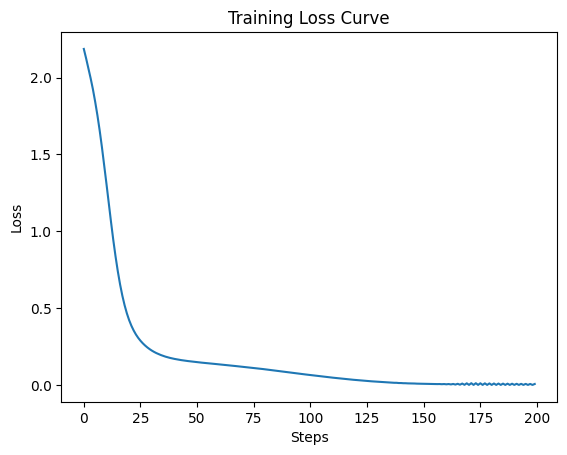

In [128]:
plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

保存模型参数

In [129]:
torch.save(model.state_dict(), 'bp_4class.params')

加载和测试模型

In [130]:
data_test = pd.read_excel("test_label.xlsx", header=None)
test_x = np.array(data_test.iloc[:, [0, 2, 4, 6]])
test_y = np.array(data_test.iloc[:, 8])
test_data = torch.tensor(test_x, dtype=torch.float32)
test_labels = torch.tensor(test_y, dtype=torch.long)

# 评估模式
clone = NeuralNetwork(input_size, hidden_size, num_classes)
clone.load_state_dict(torch.load('bp_4class.params'))
clone.eval()
with torch.no_grad():
    # 预测测试数据
    outputs = clone(test_data)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(test_data)):
        print(f"Predicted: {predicted[i]}, Actual: {test_labels[i]}")

    # 计算准确率
    correct = (predicted == test_labels).sum().item()
    total = len(test_data)
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100}%")

Predicted: 2, Actual: 0
Predicted: 2, Actual: 0
Predicted: 2, Actual: 0
Predicted: 2, Actual: 0
Predicted: 3, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 4, Actual: 2
Predicted: 4, Actual: 2
Predicted: 4, Actual: 2
Predicted: 4, Actual: 2
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Accuracy: 55.55555555555556%


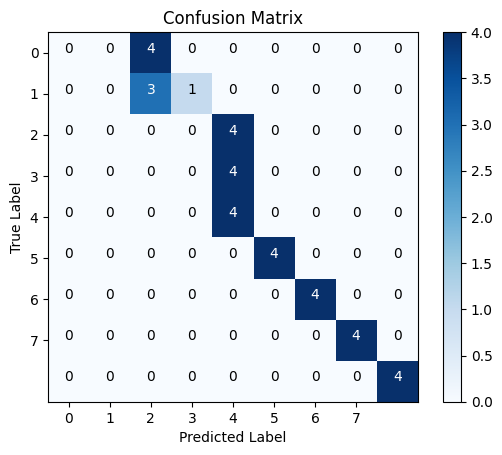

In [131]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵                                                                                                                                                                                                                                                                                     
cm = confusion_matrix(test_labels, predicted)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
classes = ['0', '1', '2', '3', '4', '5', '6', '7']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [132]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.33      1.00      0.50         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4

    accuracy                           0.56        36
   macro avg       0.48      0.56      0.50        36
weighted avg       0.48      0.56      0.50        36

